<a href="https://colab.research.google.com/github/mrudulamadhavan/Task-Management-System/blob/main/Task_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI-powered Task Management System**

An AI-powered task management system is a digital platform that leverages artificial intelligence (AI), including machine learning (ML) and natural language processing (NLP), to automate and optimize task organization, prioritization, and assignment. Unlike traditional systems that rely heavily on manual inputs and static rules, AI-powered solutions use advanced algorithms to enhance workflow efficiency, reduce human error, and increase productivity. The system intelligently classifies tasks, prioritizes them based on urgency, and assigns them to the most suitable user, considering their workload, behavior, and deadlines.

## **Problem Statement**
Design and develop an AI-powered task management system that employs NLP and ML techniques to automatically classify, prioritize, and assign tasks to users based on their behavior, deadlines, and workloads. This system aims to streamline task handling, increase efficiency, and enhance user experience by making data-driven decisions for task management.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("task_dataset.csv")

# Preview
df.head()

,Task_ID,Description,Deadline,Assigned_To,Priority,Completed
0,1,Integrate payment gateway,2025-07-15,Aanya,High,No
1,2,Integrate payment gateway,2025-07-15,Raj,Medium,Yes
2,3,Design admin dashboard UI,2025-07-17,Ira,High,Yes
3,4,Implement caching for API,2025-07-16,Vikas,Medium,No
4,5,Add multi-language support,2025-07-08,Shreya,Medium,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Task_ID      200 non-null    int64 
 1   Description  200 non-null    object
 2   Deadline     200 non-null    object
 3   Assigned_To  200 non-null    object
 4   Priority     200 non-null    object
 5   Completed    200 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB


In [4]:
df.columns

Index(['Task_ID', 'Description', 'Deadline', 'Assigned_To', 'Priority',
       'Completed'],
      dtype='object')

In [5]:
for i in ['Description', 'Deadline', 'Assigned_To', 'Priority','Completed']:
    print(i,": ",df[i].unique())
    print("--"* 30)

Description :  ['Integrate payment gateway' 'Design admin dashboard UI'
 'Implement caching for API' 'Add multi-language support'
 'Handle API rate limits' 'Fix timezone issues'
 'Write backend logs to file' 'Write deployment script'
 'Implement JWT authentication' 'Refactor user profile module'
 'Fix login bug' 'Update API documentation'
 'Migrate database to PostgreSQL' 'Add pagination to reports'
 'Setup CI/CD pipeline' 'Create automated tests'
 'Fix CSS issues on dashboard' 'Add password strength validation'
 'Optimize image loading' 'Implement forgot password flow']
------------------------------------------------------------
Deadline :  ['2025-07-15' '2025-07-17' '2025-07-16' '2025-07-08' '2025-06-28'
 '2025-07-11' '2025-07-07' '2025-07-06' '2025-07-13' '2025-07-14'
 '2025-07-12' '2025-07-09' '2025-07-05' '2025-07-04' '2025-07-03'
 '2025-06-30' '2025-07-02' '2025-07-01' '2025-07-10' '2025-06-29']
------------------------------------------------------------
Assigned_To :  ['Aanya'

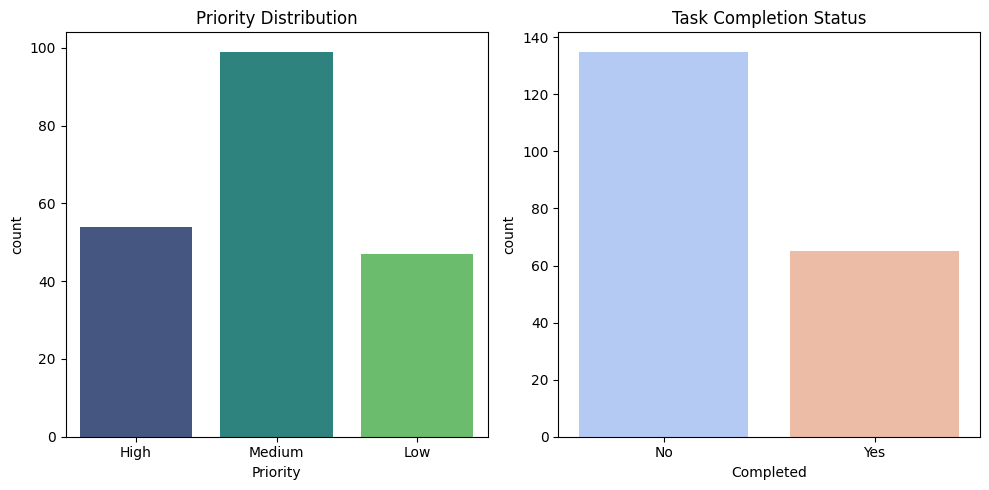

In [6]:
plt.figure(figsize=(10, 5))

# Priority Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='Priority', data=df, palette='viridis',hue = 'Priority')
plt.title("Priority Distribution")

# Task Completion Status
plt.subplot(1, 2, 2)
sns.countplot(x='Completed', data=df, palette='coolwarm',hue ='Completed')
plt.title("Task Completion Status")

# Show the plots
plt.tight_layout()
plt.show()


In [13]:
pivot_ct = df.pivot_table(index=['Description', 'Priority'], values='Completed',aggfunc='count').round(2)
pivot_ct.columns = ['Task Completion Count']
pivot_ct

Task Completion Count
Description                      Priority                       
Add multi-language support       High                          3
                                 Low                           1
                                 Medium                       10
Add pagination to reports        High                          3
                                 Low                           4
                                 Medium                        2
Add password strength validation High                          3
                                 Low                           1
                                 Medium                        4
Create automated tests           High                          2
                                 Low                           1
                                 Medium                        6
Design admin dashboard UI        High                          3
                                 Low                           1
                                 Medium                        9
Fix CSS issues on dashboard      High                          4
                                 Medium                        4
Fix login bug                    High                          3
                                 Low                           5
                                 Medium                        5
Fix timezone issues              High                          6
                                 Low                           4
                                 Medium                        8
Handle API rate limits           High                          4
                                 Low                           6
                                 Medium                        4
Implement JWT authentication     High                          4
                                 Low                           5
                                 Medium                        2
Implement caching for API        High                          1
                                 Low                           3
                                 Medium                        5
Implement forgot password flow   High                          2
                                 Low                           1
                                 Medium                        2
Integrate payment gateway        High                          2
                                 Medium                        4
Migrate database to PostgreSQL   High                          2
                                 Low                           1
                                 Medium                        6
Optimize image loading           High                          2
                                 Medium                        3
Refactor user profile module     High                          2
                                 Medium                        5
Setup CI/CD pipeline             Low                           4
                                 Medium                        3
Update API documentation         High                          2
                                 Low                           3
                                 Medium                        8
Write backend logs to file       High                          1
                                 Low                           4
                                 Medium                        6
Write deployment script          High                          5
                                 Low                           3
                                 Medium                        3

### Text Preprocessing Using NLP

In [6]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
from nltk.corpus import stopwords
import string

# Clean text function
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    stop_words = set(stopwords.words('english'))  # Get stopwords
    return ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords

# Apply the cleaning function to the Description column
df['Clean_Description'] = df['Description'].apply(clean_text)

# Display a random sample of 8 rows from the Description and Clean_Description columns
df[['Description', 'Clean_Description']].sample(8).reset_index(drop=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Description,Clean_Description
0,Fix timezone issues,fix timezone issues
1,Fix timezone issues,fix timezone issues
2,Integrate payment gateway,integrate payment gateway
3,Write deployment script,write deployment script
4,Design admin dashboard UI,design admin dashboard ui
5,Write backend logs to file,write backend logs file
6,Fix login bug,fix login bug
7,Refactor user profile module,refactor user profile module


### Model Development with Naive Bayes

Classification Report (Naive Bayes):

               precision    recall  f1-score   support

        High       0.00      0.00      0.00        10
         Low       0.50      0.40      0.44        10
      Medium       0.54      0.65      0.59        20

    accuracy                           0.42        40
   macro avg       0.35      0.35      0.35        40
weighted avg       0.40      0.42      0.41        40



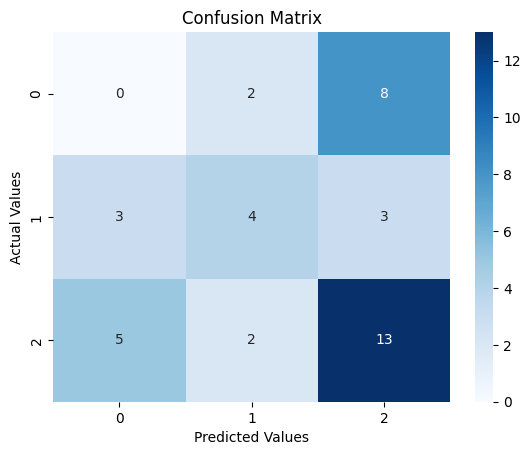

In [7]:
# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Clean_Description'])
y = df['Priority']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report (Naive Bayes):\n\n",classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()


🔎 Key Observations:
* Very poor performance for "High" priority tasks:

> * Precision, Recall, F1-score = 0.00
> * The model is completely failing to identify High priority tasks.
> * These are likely being misclassified as Medium or Low.

* Moderate performance for "Medium" priority:

> * F1-score of 0.59 shows the model is relatively better at recognizing Medium priority tasks.
> * 65% recall means it's capturing most Medium-priority cases correctly.

* Low priority class is performing slightly better than High but still underwhelming:

> * 40% recall indicates the model misses more than half of Low-priority cases.
> * F1-score is 0.44, which is still quite low.



### Model Development using Random Forest

Classification Report (Random Forest):

               precision    recall  f1-score   support

        High       0.09      0.10      0.10        10
         Low       0.38      0.30      0.33        10
      Medium       0.62      0.65      0.63        20

    accuracy                           0.42        40
   macro avg       0.36      0.35      0.35        40
weighted avg       0.43      0.42      0.42        40



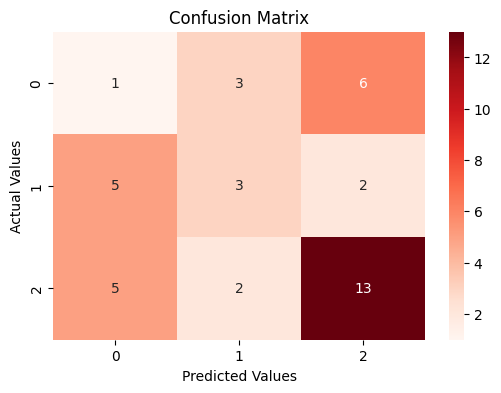

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_rf = rf.predict(X_test_rf)

# Evaluation Report
print("Classification Report (Random Forest):\n\n",classification_report(y_test_rf, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_rf, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()


In [9]:
from datetime import datetime

# Convert Deadline to datetime
df['Deadline'] = pd.to_datetime(df['Deadline'])

# Add Days_Left
df['Days_Left'] = (df['Deadline'] - pd.Timestamp.today()).dt.days

# Binary: Urgent if Days_Left < 5
df['Urgent'] = df['Days_Left'] < 5

# Convert Completed to binary
df['Completed_Binary'] = df['Completed'].map({'Yes': 1, 'No': 0})

# Check updated columns
df[['Description', 'Priority', 'Days_Left', 'Urgent', 'Completed_Binary']].head()


,Description,Priority,Days_Left,Urgent,Completed_Binary
0,Integrate payment gateway,High,5,False,0
1,Integrate payment gateway,Medium,5,False,1
2,Design admin dashboard UI,High,7,False,1
3,Implement caching for API,Medium,6,False,0
4,Add multi-language support,Medium,-2,True,1


Combined Model Evaluation:

              precision    recall  f1-score   support

        High       0.20      0.20      0.20        10
         Low       0.45      0.50      0.48        10
      Medium       0.63      0.60      0.62        20

    accuracy                           0.47        40
   macro avg       0.43      0.43      0.43        40
weighted avg       0.48      0.47      0.48        40



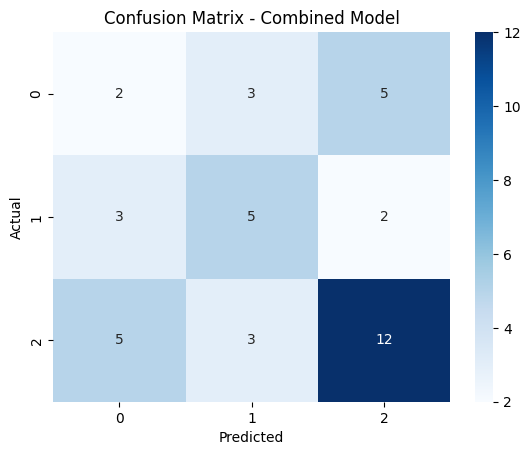

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. TF-IDF on Cleaned Descriptions
tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(df['Clean_Description'])

# 2. Additional features
X_meta = df[['Days_Left', 'Urgent', 'Completed_Binary']].copy()
scaler = StandardScaler()
X_meta_scaled = scaler.fit_transform(X_meta)

# 3. Combine TF-IDF + Meta
X_combined = hstack([X_text, X_meta_scaled])

# 4. Labels
y_combined = df['Priority']

# 5. Split
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# 6. Model
rf_combined = RandomForestClassifier(n_estimators=100, random_state=42)
rf_combined.fit(X_train_cb, y_train_cb)

# 7. Predict & Evaluate
y_pred_cb = rf_combined.predict(X_test_cb)
print("Combined Model Evaluation:\n")
print(classification_report(y_test_cb, y_pred_cb))

sns.heatmap(confusion_matrix(y_test_cb, y_pred_cb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Combined Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report (VotingClassifier - RF + LoR) :

               precision    recall  f1-score   support

        High       0.14      0.20      0.17        10
         Low       0.45      0.50      0.48        10
      Medium       0.60      0.45      0.51        20

    accuracy                           0.40        40
   macro avg       0.40      0.38      0.39        40
weighted avg       0.45      0.40      0.42        40



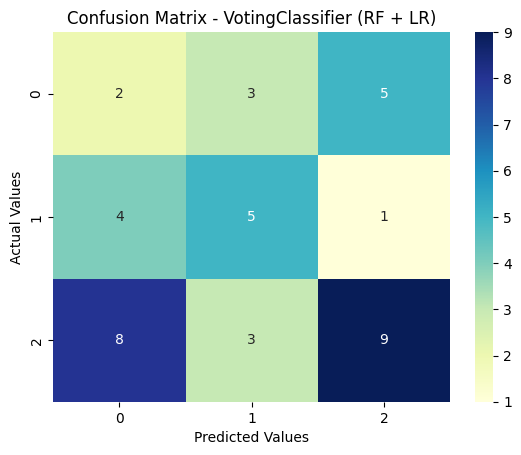

In [11]:
# New Voting Classifier with LoR and Random Forest
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_lr = LogisticRegression(max_iter=1000)

voting_clf = VotingClassifier(estimators=[
    ('rf', model_rf),
    ('lr', model_lr)
], voting='hard')

# Re-split if not already present
from sklearn.model_selection import train_test_split
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)


# Train and evaluate
voting_clf.fit(X_train_v, y_train_v)
y_pred_v = voting_clf.predict(X_test_v)

print("Classification Report (VotingClassifier - RF + LoR) :\n\n",classification_report(y_test_v, y_pred_v))

sns.heatmap(confusion_matrix(y_test_v, y_pred_v), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - VotingClassifier (RF + LR)")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

🧠 **Insights**
* "Medium" priority is predicted most effectively, with the highest precision (0.60) and F1-score (0.51).

* "Low" priority tasks show moderate performance.

* "High" priority tasks remain problematic, with a very low F1-score of 0.17, indicating poor detection.

* Overall accuracy (40%) and macro average scores indicate the model struggles to generalize across all classes.



### **Task Assignment Logic Based on Priority**

The code below performs automated task assignment based on task priority (High > Medium > Low) and ensures a balanced workload distribution across a randomly selected subset of team members.

In [22]:
import random
from collections import defaultdict

# Create a copy for assignment
df_assignment = df.copy()

# Get team members list (you can customize based on your team members column name)
team_members = df['Assigned_To'].unique()
# Randomly select 7 unique team members
random_team_members = random.sample(list(team_members), 7)

# Initialize workload dictionary
workload = {member: 0 for member in random_team_members}

# Shuffle rows to randomize assignment
df_assignment = df_assignment.sample(frac=1, random_state=42)

# Ensure 'Priority' column has valid values (High > Medium > Low)
priority_order = ['High', 'Medium', 'Low']
df_assignment['Priority'] = df_assignment['Priority'].apply(lambda x: x if x in priority_order else 'Low')  # Default to 'Low'

# Assign tasks based on priority (High > Medium > Low)
assigned_tasks = []

for priority in priority_order:
    tasks = df_assignment[df_assignment['Priority'] == priority]
    for idx, row in tasks.iterrows():
        # Find member with least load
        assignee = min(workload, key=workload.get)
        workload[assignee] += 1
        df_assignment.at[idx, 'Assigned_To'] = assignee
        assigned_tasks.append((row['Task_ID'], assignee, priority))

# View result
print("Task Assignment Complete!..Workload per member is given by,\n")
for member, count in workload.items():
    print(f"{member}: {count} tasks")
print("--"*40)
# Preview assigned DataFrame
print("\nPreview of Assigned Tasks:\n\n")
df_assignment[['Task_ID', 'Description', 'Priority', 'Assigned_To']].sample(10).reset_index(drop=True)




Task Assignment Complete!..Workload per member is given by,

Krishna: 29 tasks
Aditya: 29 tasks
Rahul: 29 tasks
Vivaan: 29 tasks
Ishaan: 28 tasks
Anjali: 28 tasks
Gaurav: 28 tasks
--------------------------------------------------------------------------------

Preview of Assigned Tasks:




,Task_ID,Description,Priority,Assigned_To
0,141,Fix timezone issues,Medium,Ishaan
1,36,Integrate payment gateway,Medium,Vivaan
2,4,Implement caching for API,Medium,Krishna
3,74,Write deployment script,High,Aditya
4,156,Add pagination to reports,High,Anjali
5,109,Add password strength validation,Low,Gaurav
6,86,Update API documentation,Medium,Anjali
7,189,Handle API rate limits,Medium,Ishaan
8,188,Add multi-language support,Medium,Vivaan
9,96,Handle API rate limits,Low,Gaurav


✅ Purpose of This Code:

To simulate intelligent task assignment that:

* Gives priority to high-priority tasks first,

* Spreads workload evenly,

* Randomly selects a subset of team members for demo/testing.

## **Conclusions**
🧠 **1. Intelligent Task Assignment Achieved**

* The system successfully automates task distribution based on priority levels (High > Medium > Low).

* It ensures a balanced workload by dynamically assigning tasks to the least-loaded team members.

📊 **2. Performance of Models**
* Naive Bayes and Voting Classifier (Random Forest + Logistic Regression) were implemented to predict task priority from descriptions.

* While the Voting Classifier performed better, overall accuracy was around 40%, and precision for high-priority tasks remained low.

* The text-based priority classification model needs improvement through advanced feature engineering, class balancing, or better NLP models.

📉 **3. Areas for Improvement**
* Model accuracy needs improvement, especially for High-priority task prediction.

* Incorporate additional metadata like department, task category, or historical completion patterns to enhance model input.

* Introduce user feedback loops to improve task predictions over time.

🚀 **4. Future Enhancements**
* Integration with email or Slack notifications.

* Add functionality to mark tasks complete within the app.

* Enable real-time collaboration and manager approvals.

* Use transformer-based models (like BERT) for better NLP performance.



------------------

**Mrudula A P**